# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [5]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [7]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [9]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [11]:
# Your code here :

from sklearn.model_selection import train_test_split

# Assuming 'data' is already loaded and contains the dataset
# Separate features (X) and target variable (y)
X = data.drop('MEDV', axis=1)  # Features
y = data['MEDV']  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting splits to verify
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (404, 13)
X_test shape: (102, 13)
y_train shape: (404,)
y_test shape: (102,)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [19]:
# Your code here :
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Generate predictions on the training set
y_train_pred = model.predict(X_train)

# Generate predictions on the testing set
y_test_pred = model.predict(X_test)

# Evaluate the model on the training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

## 3. Calculate and print R-squared for both the training and the testing set.

In [27]:
# Your code here :
# Print the results
print("Training Set Evaluation:")
print(f'Root Mean Squared Error (RMSE): {train_rmse}')
print(f'R² Score: {train_r2}')

print("\nTesting Set Evaluation:")
print(f'Root Mean Squared Error (RMSE): {test_rmse}')
print(f'R² Score: {test_r2}')

Training Set Evaluation:
Root Mean Squared Error (RMSE): 4.6520331848801675
R² Score: 0.7508856358979673

Testing Set Evaluation:
Root Mean Squared Error (RMSE): 4.928602182665358
R² Score: 0.6687594935356291


## 4. Calculate and print mean squared error for both the training and the testing set.

In [29]:
# Your code here :
print(f'Mean Squared Error (MSE): {train_mse}')

print(f'Mean Squared Error (MSE): {test_mse}')

Mean Squared Error (MSE): 21.641412753226312
Mean Squared Error (MSE): 24.29111947497373


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [31]:
# Your code here :
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error for training and testing sets
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print the results
print("Training Set Mean Absolute Error (MAE):", train_mae)
print("Testing Set Mean Absolute Error (MAE):", test_mae)


Training Set Mean Absolute Error (MAE): 3.3147716267832323
Testing Set Mean Absolute Error (MAE): 3.1890919658878736


## Classification Model Evaluation

In [35]:
from sklearn.datasets import load_iris
data = load_iris()

In [37]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [39]:
column_names = data.feature_names

In [13]:
df = pd.DataFrame(data['data'],columns=column_names)

In [14]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
target = pd.DataFrame(data.target)

In [16]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [17]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [41]:
# Your code here :
from sklearn.model_selection import train_test_split

# Feature matrix (X) and target variable (y)
X = pd.DataFrame(data['data'], columns=data['feature_names'])  # Feature matrix
y = pd.DataFrame(data['target'], columns=["Species"])  # Target variable

# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120, 1)
y_test shape: (30, 1)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [43]:
# Your code here :

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model on the training data
model.fit(X_train, y_train.values.ravel())  # y_train.values.ravel() to flatten the target

# Make predictions on both the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred, target_names=data.target_names)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)

# Evaluate the model on the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred, target_names=data.target_names)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the results
print("Training Set Classification Report:")
print(train_class_report)
print("Training Set Confusion Matrix:")
print(train_conf_matrix)

print("Testing Set Classification Report:")
print(test_class_report)
print("Testing Set Confusion Matrix:")
print(test_conf_matrix)


Training Set Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       1.00      0.93      0.96        41
   virginica       0.93      1.00      0.96        39

    accuracy                           0.97       120
   macro avg       0.98      0.98      0.97       120
weighted avg       0.98      0.97      0.97       120

Training Set Confusion Matrix:
[[40  0  0]
 [ 0 38  3]
 [ 0  0 39]]
Testing Set Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Testing Set Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [45]:
# Your code here :

print(f"Training Set Accuracy: {train_accuracy:.4f}")

print(f"\nTesting Set Accuracy: {test_accuracy:.4f}")

Training Set Accuracy: 0.9750

Testing Set Accuracy: 1.0000


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [47]:
# Your code here :
from sklearn.metrics import balanced_accuracy_score

# Calculate balanced accuracy for both training and testing sets
train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

# Print the results
print(f"Training Set Balanced Accuracy: {train_balanced_accuracy:.4f}")
print(f"Testing Set Balanced Accuracy: {test_balanced_accuracy:.4f}")


Training Set Balanced Accuracy: 0.9756
Testing Set Balanced Accuracy: 1.0000


## 10. Calculate and print the precision score for both the training and the testing set.

In [49]:
# Your code here :
from sklearn.metrics import precision_score

# Calculate precision for both training and testing sets (using average='weighted' for multi-class)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')

# Print the results
print(f"Training Set Precision: {train_precision:.4f}")
print(f"Testing Set Precision: {test_precision:.4f}")


Training Set Precision: 0.9768
Testing Set Precision: 1.0000


## 11. Calculate and print the recall score for both the training and the testing set.

In [51]:
# Your code here :
from sklearn.metrics import recall_score

# Calculate recall for both training and testing sets (using average='weighted' for multi-class)
train_recall = recall_score(y_train, y_train_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')

# Print the results
print(f"Training Set Recall: {train_recall:.4f}")
print(f"Testing Set Recall: {test_recall:.4f}")


Training Set Recall: 0.9750
Testing Set Recall: 1.0000


## 12. Calculate and print the F1 score for both the training and the testing set.

In [53]:
# Your code here :

from sklearn.metrics import f1_score

# Calculate F1 score for both training and testing sets (using average='weighted' for multi-class)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the results
print(f"Training Set F1 Score: {train_f1:.4f}")
print(f"Testing Set F1 Score: {test_f1:.4f}")


Training Set F1 Score: 0.9750
Testing Set F1 Score: 1.0000


## 13. Generate confusion matrices for both the training and the testing set.

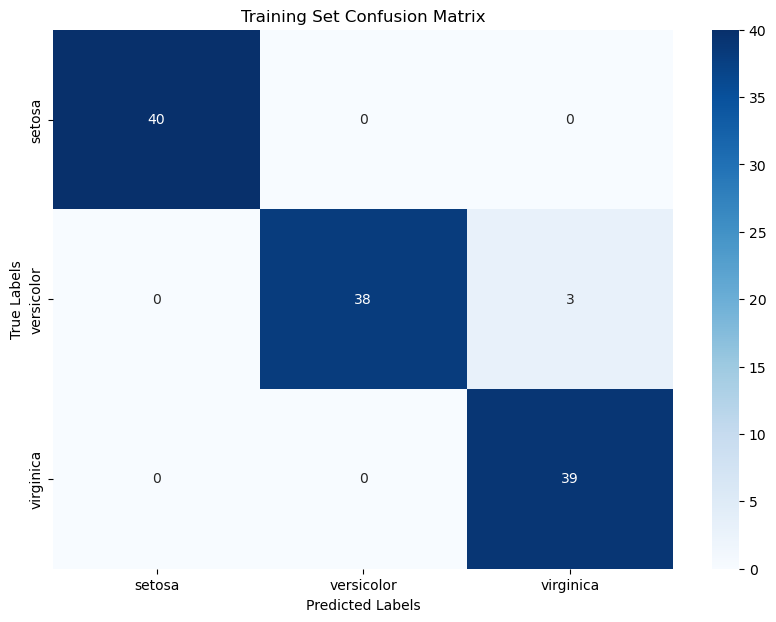

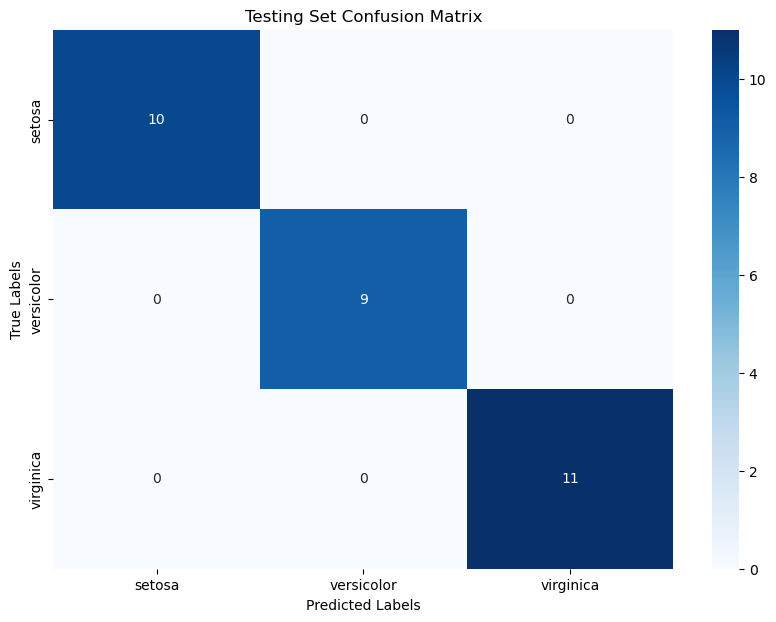

In [55]:
# Your code here :

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrices for training and testing sets
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for training set
plt.figure(figsize=(10, 7))
sns.heatmap(train_conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Training Set Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plot confusion matrix for testing set
plt.figure(figsize=(10, 7))
sns.heatmap(test_conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Testing Set Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [26]:
# Have fun here !